# Duda:
# Relación datos de entrada, datos de salida y pesos. 
# Normalización de datos de entrada.

In [2]:
%matplotlib inline
import os
import numpy as np
import scipy as sp
import neurolab as nl
import matplotlib.pyplot as plt

## A) 

In [3]:
# Create train samples
x = np.linspace(-7, 7, 20)
y = np.sin(x) * 0.5

size = len(x)

inp = x.reshape(size,1)
tar = y.reshape(size,1)

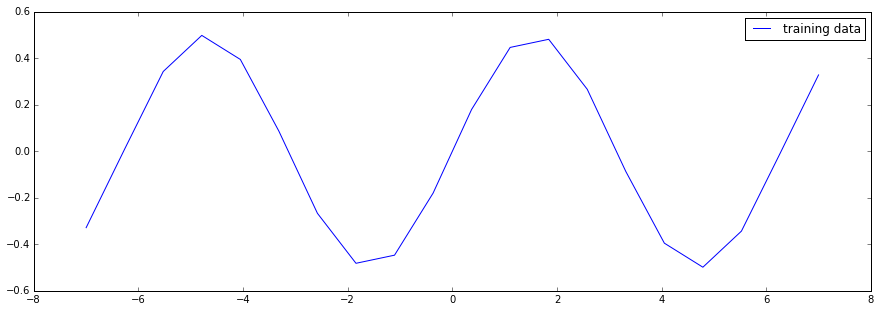

In [4]:
plt.figure(figsize=((15,5)))
plt.plot(x,y); plt.legend(["training data"])

Epoch: 100; Error: 0.0345904509216;
The goal of learning is reached
109


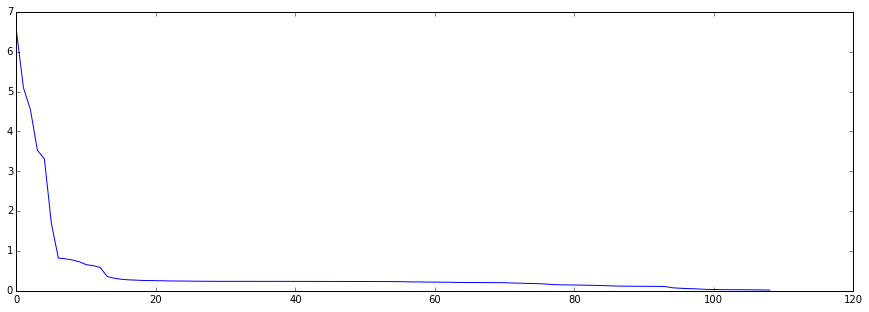

In [5]:
# Create network with 2 layers and random initialized
net = nl.net.newff([[-7, 7]],[5, 1])
# Train network
error = net.train(inp, tar, epochs=500, show=100, goal=0.02)
print len(error)
plt.figure(figsize=((15,5)))
plt.plot(range(len(error)), error)

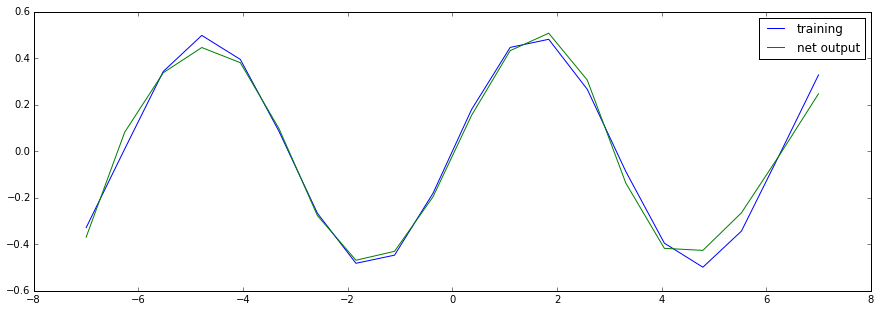

In [6]:
# Simulate network
out = net.sim(inp)
len(out)
plt.figure(figsize=((15,5)))
plt.plot(x, y, "-", x, out)
plt.legend(["training", "net output"])

# B) 

In [98]:
# Create train samples
x = np.linspace(-7, 7, 20)
y = np.sin(x) * 6

size = len(x)

inp = x.reshape(size,1)
tar = y.reshape(size,1)

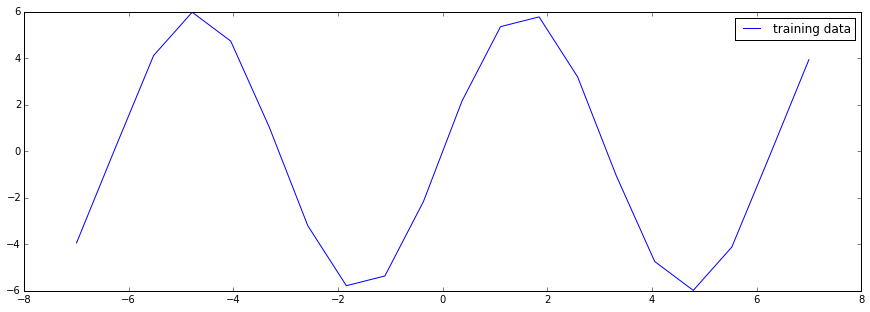

In [99]:
plt.figure(figsize=((15,5)))
plt.plot(x,y); plt.legend(["training data"])

Epoch: 100; Error: 105.272373079;
141


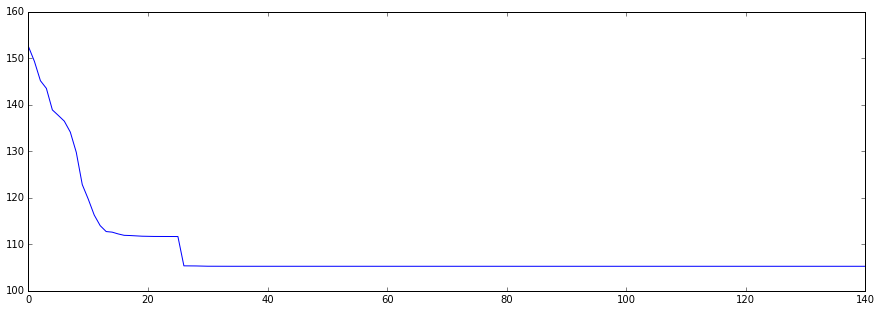

In [100]:
# Create network with 2 layers and random initialized
net = nl.net.newff([[-7, 7]],[5, 1])
# Train network
error = net.train(inp, tar, epochs=500, show=100, goal=0.02)
print len(error)
plt.figure(figsize=((15,5)))
plt.plot(range(len(error)), error)

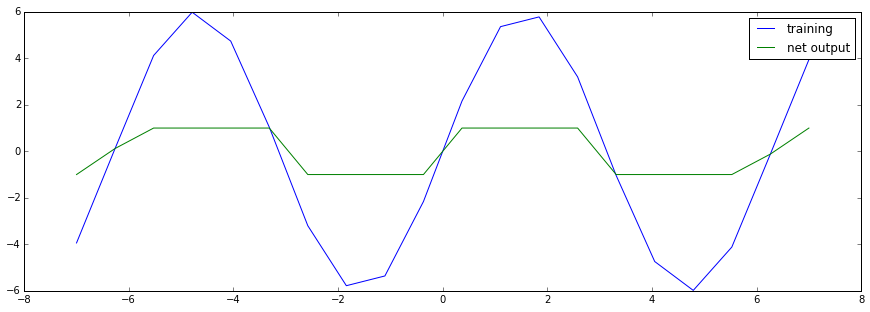

In [101]:
# Simulate network
out = net.sim(inp)
len(out)
plt.figure(figsize=((15,5)))
plt.plot(x, y, "-", x, out)
plt.legend(["training", "net output"])

# C )

### Representamos los datos

In [8]:
PATH="/Volumes/ekman/code/002_dev/NeuronalNetwork/data"
data = sp.genfromtxt(os.path.join(PATH,"web_traffic.tsv"), delimiter="\t")

In [9]:
# separamos las dos dimensiones en dos vectores
x = data[:,0]
y = data[:,1]
# vamos a ver cuantos valores nan existen
sp.sum(sp.isnan(y))
# filtramos
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

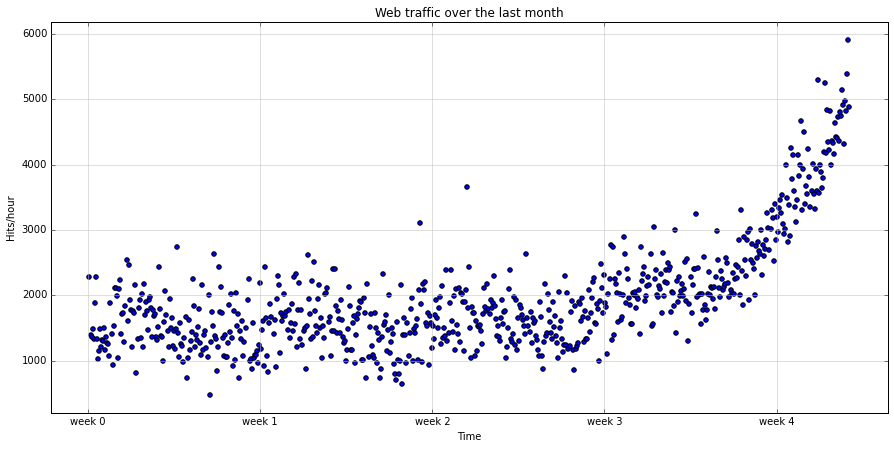

In [10]:
def representar_datos(x, y):
    plt.figure(figsize=(15,7))
    plt.scatter(x, y, s=20)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
    plt.autoscale(tight=True)
    plt.grid(True, linestyle='-', color='0.75')
    
representar_datos(x,y)

## Separamos los datos en entrenamiento y test

# Caso A ) 

In [46]:
# slit data in train set and traing set
n_samples = x.shape[0]

indices = np.random.permutation(x.shape[0])
indices_train= indices[:n_samples*0.8] 
indices_test= indices[n_samples*0.8:]
x_train, y_train= x[indices_train], y[indices_train]
x_test, y_test= x[indices_test], y[indices_test]
x_train.shape

(588,)

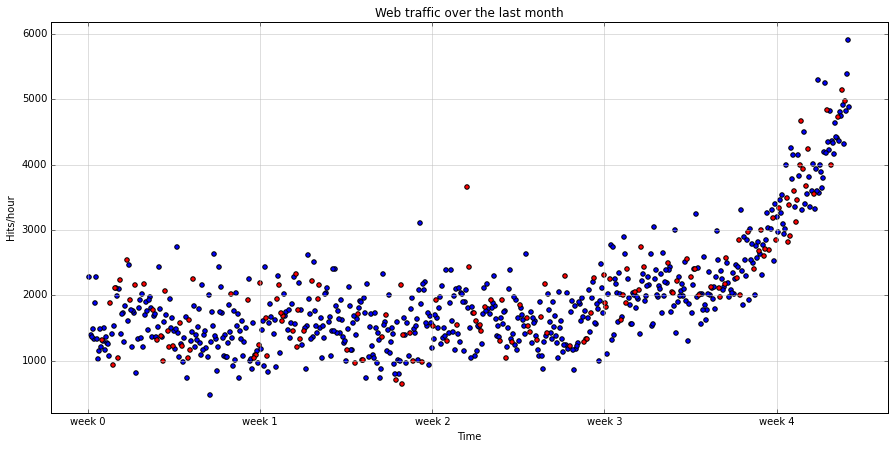

In [47]:
def plot_train_test():
    plt.figure(figsize=(15,7))
    plt.scatter(x_train, y_train, s=20)
    plt.scatter(x_test, y_test, s=20, c="red")
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
    plt.autoscale(tight=True)
    plt.grid(True, linestyle='-', color='0.75')
    
plot_train_test()

### Entrenamos la red

In [55]:
x_train = x_train.reshape(len(x_train), 1)
y_train = y_train.reshape(len(y_train), 1)
inputL = [[x_train.min(),x_train.max()]]
hiddenOutputL = [7,1]


Number of epoch: 1


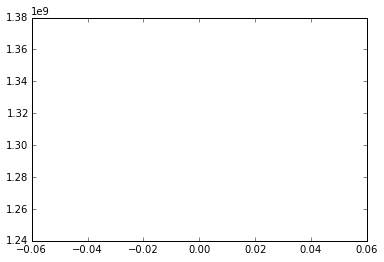

In [66]:
net = nl.net.newff( inputL, [5, 1])
error=net.train(x_train, y_train, show=100, epochs=500, goal=0.02)
print
print "Number of epoch: {0}".format(len(error))
plt.plot(range(len(error)), error)

# Caso B)

In [36]:
x_train, y_train = x[:n_samples*0.8], y[:n_samples*0.8]
x_test, y_test = x[n_samples*0.8:], y[n_samples*0.8:]

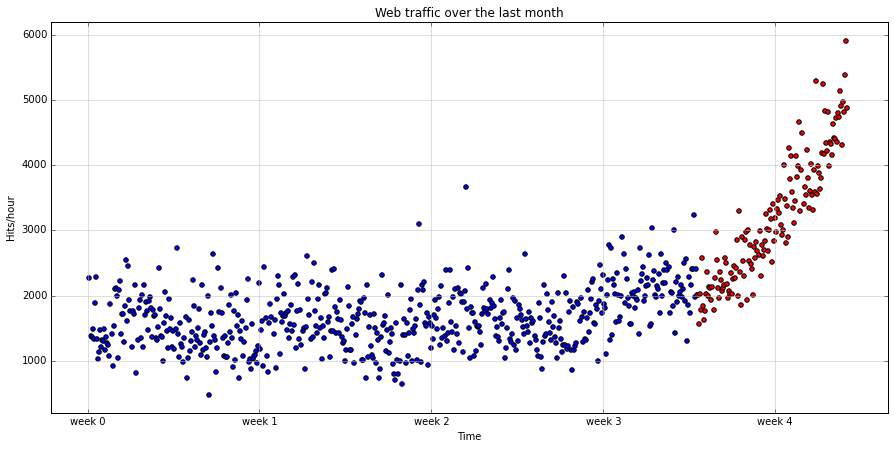

In [37]:
plot_train_test()

# Normalización datos de entrada

In [ ]:
# %load normalization.py

import numpy as np

def normalizacion_0(array):
	return (array - array.min())/(array.max()-array.min())

def normalizacion_1(array, ra, rb):
	""" ??? """
	a = array.min()
	b = array.max()
	return rb + ((ra - rb)*(array - a))/(b-a)

def normalizacion_2(array, AP0=None, AP1=None):
	""" meteo:
	( AP - AP0) / (AP1 - AP0)
	AP : current air preassure
	AP0: air preassure you want to sent to 0
	AP1: air preassure you want to sent to 1
   	"""
	if AP0 is None: AP0=array.min()
	if AP1 is None: AP1=array.max()
	return (array - AP0) / (AP1 - AP0)i

def normalization_3(array):
	"""Y. Le Cun (Efficient Backprop)
	C_{i} = \frac{1}{p} \sum_{i=1}^{9} (Z_{i}^{p})^{2}
	"""
	# Here ************************
	return np.sum()/len(array)
	
	




def main():
	wind = np.random.randint(10, 80, size=50)
	print wind; print "*"*43
	print normalizacion_1(wind, 5, 6)
	print ""; print "meteo ...."
	print normalizacion_2(wind) 
if __name__ == "__main__":
	main()	
